# Алгоритм Дойча-Джозы

$$f: \{0, 1\}^n \rightarrow \{0, 1\} $$

$$
    f(x) = \left[
        \begin{array}{c}
            \text{const} \\
            \text{|x: f(x) = 0| = |x: f(x) = 1|}
        \end{array}
    \right.
$$

Требуется определить является ли f(x) = const?

 <center>
    <img src="../images/deutsch-jozsa.png" width="520">
</center>

### Пример №1

$x$ состоит из 2-х кубитов

In [1]:
import qiskit
import qiskit_aer

qin = qiskit.QuantumRegister(2, 'x')
qout = qiskit.QuantumRegister(1, 'y')

c = qiskit.ClassicalRegister(2)

qc = qiskit.QuantumCircuit(qin, qout, c)

def balanced2(circ, input, output):
    circ.cx(input[0], output)
    circ.cx(input[1], output)

def constant2(circ, input, output):
    pass

qc.h(qin)
qc.x(qout)
qc.h(qout)

constant2(qc, qin, qout)
# balanced2(qc, qin, qout)

qc.h(qout)
qc.barrier()

qc.h(qin)

qc.measure(qin, c)

display(qc.draw())

┌───┐           ░ ┌───┐┌─┐   
 x_0: ┤ H ├───────────░─┤ H ├┤M├───
      ├───┤           ░ ├───┤└╥┘┌─┐
 x_1: ┤ H ├───────────░─┤ H ├─╫─┤M├
      ├───┤┌───┐┌───┐ ░ └───┘ ║ └╥┘
   y: ┤ X ├┤ H ├┤ H ├─░───────╫──╫─
      └───┘└───┘└───┘ ░       ║  ║ 
c0: 2/════════════════════════╩══╩═
                              0  1

In [2]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'00': 1024}

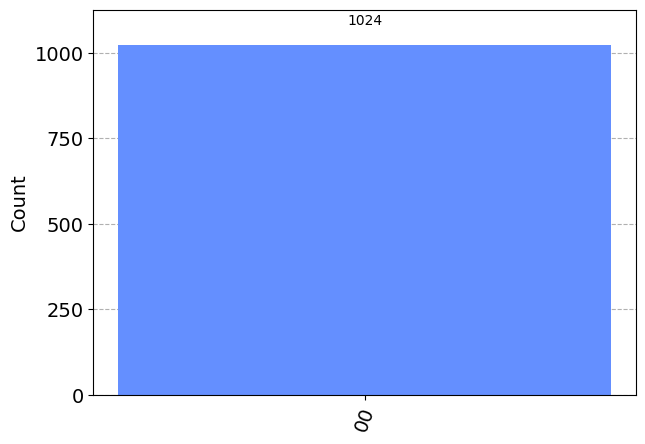

In [3]:
qiskit.visualization.plot_histogram(counts)

### Пример №2

$x$ состоит из 3-х кубитов

In [4]:
import qiskit
import qiskit_aer

qin = qiskit.QuantumRegister(3, 'x')
qout = qiskit.QuantumRegister(1, 'y')

c = qiskit.ClassicalRegister(3)

qc = qiskit.QuantumCircuit(qin, qout, c)

def balanced3(circ, input, output):
    circ.cx(input[0], output)
    circ.cx(input[1], output)
    circ.cx(input[2], output)

def constant3(circ, input, output):
    pass

qc.h(qin)
qc.x(qout)
qc.h(qout)

constant3(qc, qin, qout)
# balanced3(qc, qin, qout)

qc.h(qout)
qc.barrier()

qc.h(qin)

qc.measure(qin, c)

display(qc.draw())

┌───┐           ░ ┌───┐┌─┐      
 x_0: ┤ H ├───────────░─┤ H ├┤M├──────
      ├───┤           ░ ├───┤└╥┘┌─┐   
 x_1: ┤ H ├───────────░─┤ H ├─╫─┤M├───
      ├───┤           ░ ├───┤ ║ └╥┘┌─┐
 x_2: ┤ H ├───────────░─┤ H ├─╫──╫─┤M├
      ├───┤┌───┐┌───┐ ░ └───┘ ║  ║ └╥┘
   y: ┤ X ├┤ H ├┤ H ├─░───────╫──╫──╫─
      └───┘└───┘└───┘ ░       ║  ║  ║ 
c1: 3/════════════════════════╩══╩══╩═
                              0  1  2

In [5]:
simulator = qiskit_aer.AerSimulator()

result = simulator.run(qc).result()

counts = result.get_counts(qc)

counts

{'000': 1024}

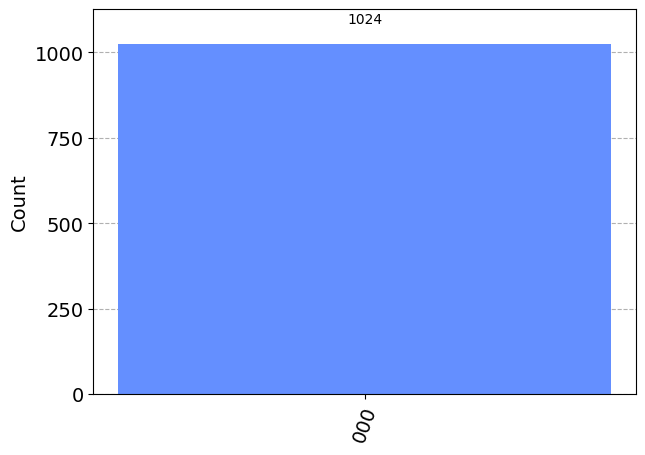

In [6]:
qiskit.visualization.plot_histogram(counts)